In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

## Loading database

In [18]:
df = pd.read_csv('/media/lps/Storage/codes/statistic-ds-ml/Bases de dados/credit_data.csv')
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


## Preprocessing database

In [19]:
df.shape

(2000, 5)

In [20]:
df.dropna(inplace=True)
df.shape

(1997, 5)

<AxesSubplot: xlabel='c#default', ylabel='count'>

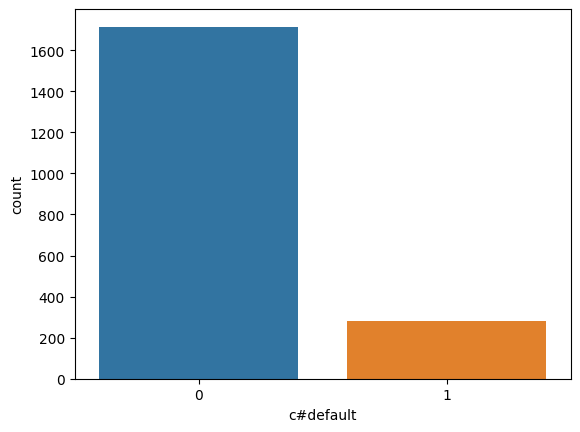

In [21]:
sns.countplot(x=df['c#default'])

In [23]:
y_df = df.pop('c#default')
y_df

0       0
1       0
2       0
3       0
4       1
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: c#default, Length: 1997, dtype: int64

In [25]:
X = df.values
y = y_df.values

X.shape, y.shape

((1997, 4), (1997,))

### Splitting training and test data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, y_test.shape

((1597, 4), (400,))

## Training with naive bayes model

In [30]:
nb = GaussianNB()
nb.fit(X=X_train, y=y_train)

GaussianNB()

### Evaluation naive bayes model

#### Accuracy

In [32]:
y_pred = nb.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9325

#### Confusion matrix

In [35]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[339,   4],
       [ 23,  34]])

<AxesSubplot: >

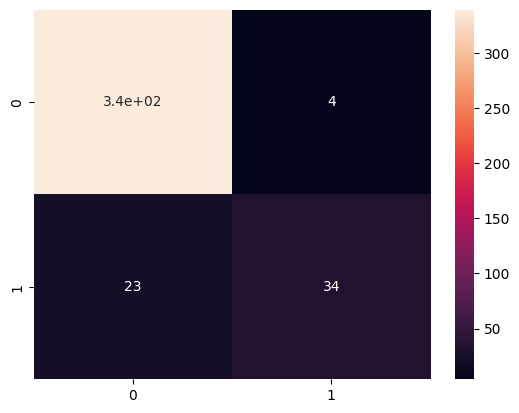

In [37]:
sns.heatmap(data=cm, annot=True)

In [58]:
def evaluate_classes(cm):
    print(f'Class 0 accuracy: {cm[0][0] / sum(cm[0])}')
    print(f'Class 1 accuracy: {cm[1][1] / sum(cm[1])}')

In [59]:
evaluate_classes(cm=cm)

Class 0 accuracy: 0.9883381924198251
Class 1 accuracy: 0.5964912280701754


## Undersampling using tomek links technique

In [47]:
tl = TomekLinks(sampling_strategy='majority')
X_us, y_us = tl.fit_resample(X, y)

In [48]:
X_us.shape, y_us.shape

((1894, 4), (1894,))

In [50]:
np.unique(y_us, return_counts=True)

(array([0, 1]), array([1611,  283]))

In [66]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size=0.2)

In [67]:
nb_us = GaussianNB()
nb_us.fit(X=X_train_us, y=y_train_us)

GaussianNB()

In [68]:
y_pred_us = nb_us.predict(X_test_us)
accuracy_score(y_true=y_test_us, y_pred=y_pred_us)

0.9287598944591029

In [69]:
cm_us = confusion_matrix(y_true=y_test_us, y_pred=y_pred_us)
cm_us

array([[321,   4],
       [ 23,  31]])

<AxesSubplot: >

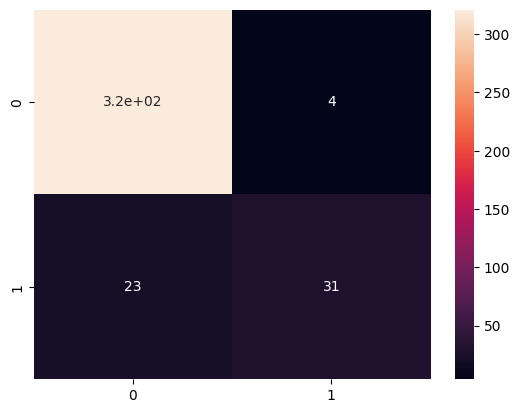

In [70]:
sns.heatmap(cm_us, annot=True)

In [71]:
evaluate_classes(cm=cm_us)

Class 0 accuracy: 0.9876923076923076
Class 1 accuracy: 0.5740740740740741


## Oversampling using SMOTE technique

In [72]:
smote = SMOTE(sampling_strategy='minority')
X_ov, y_ov = smote.fit_resample(X, y)

In [73]:
X_ov.shape, y_ov.shape

((3428, 4), (3428,))

In [74]:
np.unique(y_ov, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [76]:
X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ov, y_ov, test_size=0.2)

In [77]:
X_train_ov.shape, X_test_ov.shape

((2742, 4), (686, 4))

In [78]:
nb_ov = GaussianNB()
nb_ov.fit(X_train_ov, y_train_ov)

GaussianNB()

In [81]:
y_pred_ov = nb_ov.predict(X_test_ov)
accuracy_score(y_true=y_test_ov, y_pred=y_pred_ov)

0.9271137026239067

In [82]:
cm_ov = confusion_matrix(y_true=y_test_ov, y_pred=y_pred_ov)
cm_ov

array([[306,  40],
       [ 10, 330]])

<AxesSubplot: >

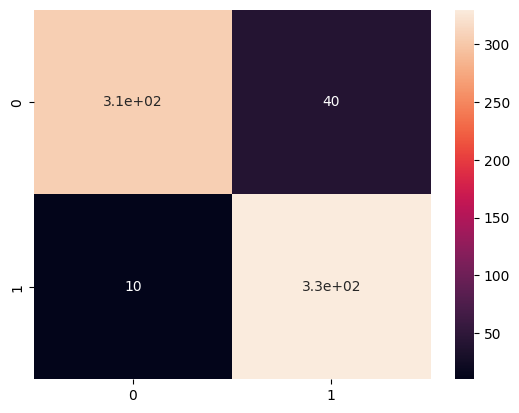

In [83]:
sns.heatmap(cm_ov, annot=True)

In [84]:
evaluate_classes(cm=cm_ov)

Class 0 accuracy: 0.884393063583815
Class 1 accuracy: 0.9705882352941176


Class 0 accuracy improvement was great!